In [412]:
import pandas as pd
import utils
import numpy as np
import matplotlib.pyplot as plt
import time as timefn
import scipy.io
import csv
from bs4 import BeautifulSoup

%matplotlib inline

## Download Data from Drive

Getting data from the original sources takes time due to traffic on some of their servers - I compiled everything so far in a Data folder. Download from my Drive:

https://drive.google.com/drive/folders/1cXnuWFnXIfvyq_TeodCP-T0iuQKsJei0?usp=sharing

and put in the repo base folder

Sorry this is so clunky, I know there is a way to automate with Drive API but I haven't figured it out yet

To see how to download data from the original sources, see the "Downloading_Data.ipynb"

### Data - Sites

We will show a case study of the using our optimization in 4 situations: 2 different scales (residential vs. industry) and in two locations. For now, I chose the locations as

Santa Maria, CA

Salem, OR

The case study will look at cost savings using our algorithms for the period 11/1/16 to 11/1/17 compared to several "human-input" procedures

## Load Weather Observation and Weather Forecast Data

The weather and weather forecast data is used in many of the subtasks

Weather Observation data is data from weather that actually happened and was recorded. I downloaded data for Salem, OR and Santa Maria, CA for 2016-2017 test year and for 2010 (to compare with solar data)

Weather Forecast data is historical weather forecasts, predicting future hourly data. I downloaded for each data for 2016-2017 test year.

In [413]:
#Weather observation data

#In each of these dataframes, Salem and Santa Maria data are combined

df_weather_2010_HN = pd.read_csv('Data/Weather_Observations/1124193.csv') #NOAA Hourly Normals Dataset
#NOAA Hourly Normals Documentation: https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/NORMAL_HLY_documentation.pdf
#No Hourly normals data for 2016-2017

df_weather_201617_LCD = pd.read_csv('Data/Weather_Observations/1124228.csv') #NOAA Local Climatological Dataset
df_weather_2010_LCD = pd.read_csv('Data/Weather_Observations/1124410.csv')
#NOAA LCD Documentation: https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/LCD_documentation.pdf

/Users/ryanstoddard/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10,11,12,13,14,15,16,17,44,45,46,47,63,64,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/ryanstoddard/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10,11,14,15,20,22,38,64,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


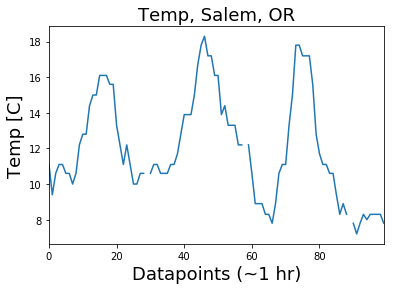

In [414]:
#Example Weather observation data

ax8 = df_weather_201617_LCD.HOURLYDRYBULBTEMPC[:100].plot()
ax8.set_ylabel('Temp [C]', fontsize=18)
ax8.set_xlabel('Datapoints (~1 hr)',fontsize=18)
ax8.set_title('Temp, Salem, OR',fontsize=18)
plt.show()

In [ ]:
#Weather forecast data

#weather forecast data is in .json format it Data/Weather_Forecast folder. I haven't had 
#a chance to parse yet - if you are reading this and have some time implement the parsing here

#The forecast data is what will allow us to make predictions as in a real scenario - we have 
#weather/price/demand/solar data, model a forcast for each for the next 24 hours, then choose 
#how to opperate our PV + battery asset

#each .json file has an hourly forecast, and I downloaded one each 24 hours

#the .csv files have the filenames that correspond to the dates - dates listed in UNIX time format

# Subtasks


## Subtask 1: Energy price modeling

## Subtask 2: Energy Demand modeling

## Subtask 3: PV output modeling

## Subtask 4: Battery State of Health modeling

## Subtask 5: Optimization Procedure

## 1. Energy Price Modeling

Objective: Predict the Energy price vs. time for one day ahead. This data will go into optimization protocol to decide how to opperate PV + Battery system

Strategy: Use past energy price info with weather observations (and other data as needed) to generate a model to predict energy price data 1 day in advance for 11/1/16 to 11/1/17. Use Weathe forecasts for predictions. Compare with real data to make the best possible model. 

Note that to predict the entire test period (11/1/16 to 11/1/17) will probably need to download data 1 year prior (so can get predictions for the earlier time points)

In [416]:
#This section is for parsing the Energy price data for San Luis Obispo, CA
#(Note that I tried multiple nodes in Santa Maria, and they each had 1 or 2 months
#with bad data)
xml_fns = ['20161230_20170129_PRC_LMP_DAM_20171109_22_39_33_v1.xml',
 '20170129_20170226_PRC_LMP_DAM_20171109_22_44_32_v1.xml',
 '20170226_20170326_PRC_LMP_DAM_20171109_22_48_57_v1.xml',
 '20170326_20170425_PRC_LMP_DAM_20171109_22_52_29_v1.xml',
 '20170425_20170524_PRC_LMP_DAM_20171109_22_55_08_v1.xml',
 '20170524_20170623_PRC_LMP_DAM_20171109_22_56_31_v1.xml',
 '20170623_20170722_PRC_LMP_DAM_20171109_22_58_03_v1.xml',
 '20170722_20170821_PRC_LMP_DAM_20171109_22_59_27_v1.xml',
 '20170821_20170920_PRC_LMP_DAM_20171109_23_00_54_v1.xml',
 '20170920_20171019_PRC_LMP_DAM_20171109_23_02_18_v1.xml',
 '20171019_20171101_PRC_LMP_DAM_20171109_23_03_36_v1.xml',
 '20161101_20161130_PRC_LMP_DAM_20171109_22_24_58_v1.xml',
 '20161130_20161230_PRC_LMP_DAM_20171109_22_26_41_v1.xml']

for jj in range(13):
    with open('Data/Energy_Price/' + xml_fns[jj], "r") as src:
        soup = BeautifulSoup(src, "xml")
    if jj == 1:
        df1 = df2
    if jj > 1:
        df1 = df1.append(df2)
    df2 = pd.DataFrame([
    {

        "LMP" : i.VALUE.text if i.DATA_ITEM.text == 'LMP_PRC' else None,
        #"Energy" : i.VALUE.text if i.DATA_ITEM.text == 'LMP_ENE_PRC',
        #"Loss" : i.VALUE.text, if i.DATA_ITEM.text == 'LMP_LOSS_PRC',
        #"Congestion" : i.VALUE.text, if i.DATA_ITEM.text == 'LMP_CONG_PRC',
        "time" : i.INTERVAL_START_GMT.text}
    for i in soup.OASISReport.findChildren("REPORT_DATA")]
    )

    df2 = df2.dropna(axis=0, how='any')
    if jj == 12:
        df1 = df1.append(df2)
    #Need to fix this to get unzipped filename even when already exists
    #utils.remove_data(URL,'zip')

/Users/ryanstoddard/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if sys.path[0] == '':


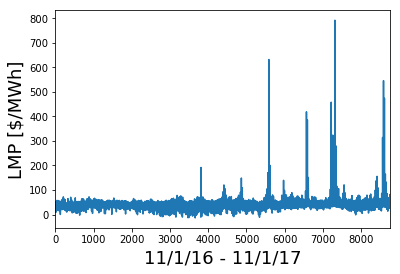

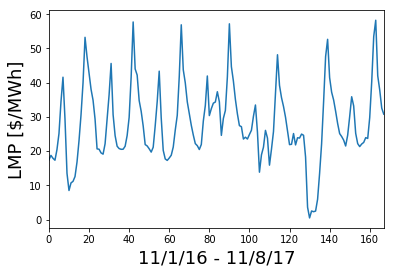

In [418]:
#Take a look at Energy Price Data

df1 = df1.sort_values('time')
df1.shape
#df4 = df1[['LMP']]
#df4 = df4.reset_index(drop=True)
#df4.LMP = df.LMP.astype(float)
#df4.LMP[:80]

df4 = df1.reset_index(drop=True)

df5 = df4.convert_objects(convert_numeric=True)

ax1 = df5.LMP.plot()
ax1.set_ylabel('LMP [$/MWh]', fontsize=18)
ax1.set_xlabel('11/1/16 - 11/1/17',fontsize=18)
plt.show()
ax2 = df5.LMP[:168].plot()
ax2.set_ylabel('LMP [$/MWh]', fontsize=18)
ax2.set_xlabel('11/1/16 - 11/8/17',fontsize=18)
plt.show()


In [419]:
#This section is for parsing the Energy price data (Salem, OR)
xml_fns2 = ['20161101_20161130_PRC_LMP_DAM_20171111_12_04_55_v1.xml',
 '20161130_20161230_PRC_LMP_DAM_20171111_12_09_24_v1.xml',
 '20161230_20170129_PRC_LMP_DAM_20171111_12_14_09_v1.xml',
 '20170129_20170226_PRC_LMP_DAM_20171111_12_19_04_v1.xml',
 '20170226_20170326_PRC_LMP_DAM_20171111_12_23_16_v1.xml',
 '20170326_20170425_PRC_LMP_DAM_20171111_12_26_19_v1.xml',
 '20170425_20170524_PRC_LMP_DAM_20171111_12_29_26_v1.xml',
 '20170524_20170623_PRC_LMP_DAM_20171111_12_30_47_v1.xml',
 '20170623_20170722_PRC_LMP_DAM_20171111_12_32_09_v1.xml',
 '20170722_20170821_PRC_LMP_DAM_20171111_12_33_27_v1.xml',
 '20170821_20170920_PRC_LMP_DAM_20171111_12_34_48_v1.xml',
 '20170920_20171019_PRC_LMP_DAM_20171111_12_36_10_v1.xml',
 '20171019_20171101_PRC_LMP_DAM_20171111_12_37_27_v1.xml']

for jj in range(13):
    with open('Data/Energy_Price/' + xml_fns2[jj], "r") as src:
        soup = BeautifulSoup(src, "xml")
    if jj == 1:
        df1 = df2
    if jj > 1:
        df1 = df1.append(df2)
    df2 = pd.DataFrame([
    {

        "LMP" : i.VALUE.text if i.DATA_ITEM.text == 'LMP_PRC' else None,
        #"Energy" : i.VALUE.text if i.DATA_ITEM.text == 'LMP_ENE_PRC',
        #"Loss" : i.VALUE.text, if i.DATA_ITEM.text == 'LMP_LOSS_PRC',
        #"Congestion" : i.VALUE.text, if i.DATA_ITEM.text == 'LMP_CONG_PRC',
        "time" : i.INTERVAL_START_GMT.text}
    for i in soup.OASISReport.findChildren("REPORT_DATA")]
    )

    df2 = df2.dropna(axis=0, how='any')
    if jj == 12:
        df1 = df1.append(df2)
    #Need to fix this to get unzipped filename even when already exists
    #utils.remove_data(URL,'zip')

/Users/ryanstoddard/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  # This is added back by InteractiveShellApp.init_path()


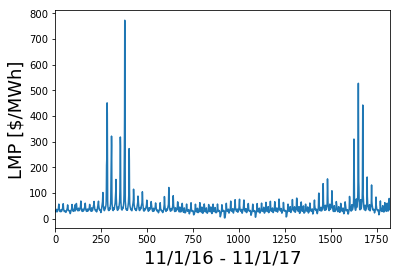

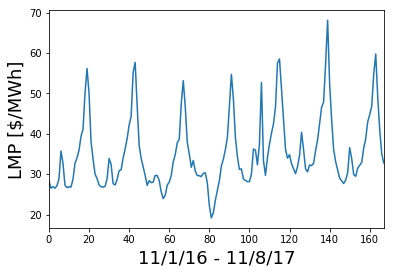

In [420]:
#Take a look at Energy Price Data
df1 = df1.sort_values('time')
df1.shape
#df4 = df1[['LMP']]
#df4 = df4.reset_index(drop=True)
#df4.LMP = df.LMP.astype(float)
#df4.LMP[:80]

df4 = df1.reset_index(drop=True)

df5 = df4.convert_objects(convert_numeric=True)

ax3 = df5.LMP.plot()
ax3.set_ylabel('LMP [$/MWh]', fontsize=18)
ax3.set_xlabel('11/1/16 - 11/1/17',fontsize=18)
plt.show()
ax4 = df5.LMP[:168].plot()
ax4.set_ylabel('LMP [$/MWh]', fontsize=18)
ax4.set_xlabel('11/1/16 - 11/8/17',fontsize=18)
plt.show()


## Model Energy Demand

Objective: Predict the Energy Demand vs. time for one day ahead. This data will go into optimization protocol to decide how to opperate PV + Battery system. 

Strategy: Similar to above, but some added nuances

Note that the data here is for the entire PGE energy massive region in CA, it is just an example. We should subdivide into 4 cases as discussed (residential, industry/server center) * (Santa Maria, Salem). I don't think it makes sense to model single residential home demand (too volatile and not realistic), but we can model blocks of residential homes and industry, to account for differences in the two types of energy use

Some other data may be found on https://www.enernoc.com/ or similar

In [376]:
#Download Energy Demand data
start_times = ['20161101','20161201','20161231','20170130','20170227','20170326','20170425','20170524','20170623','20170722','20170821','20170920','20171019']
end_times = ['20161201','20161231','20170130','20170227','20170326','20170425','20170524','20170623','20170722','20170821','20170920','20171019','20171101']

#Can only request data for 30 days at a time
xml_fn_demand = []
for j in range(13):
    URL = 'http://oasis.caiso.com/oasisapi/SingleZip?queryname=SLD_FCST&startdatetime=' + start_times[j] + 'T07:00-0000&enddatetime=' + end_times[j] + 'T07:00-0000&version=1&market_run_id=ACTUAL'
    fn = utils.get_data(URL,'zip')
    xml_fn_demand.append(fn)
    timefn.sleep(5) #so you don't get denied access
    




Extracting zip
Extracting zip
Extracting zip
Extracting zip
Extracting zip
Extracting zip
Extracting zip
Extracting zip
Extracting zip
Extracting zip
Extracting zip
Extracting zip
Extracting zip


In [378]:
#This section is for parsing the Energy price data (Salem, OR)
for jj in range(13):
    with open(xml_fn_demand[jj], "r") as src:
        soup = BeautifulSoup(src, "xml")
    if jj == 1:
        df1 = df2
    if jj > 1:
        df1 = df1.append(df2)
    df2 = pd.DataFrame([
    {

        "DEM_MW" : i.VALUE.text if i.RESOURCE_NAME.text == 'PGE-TAC' else None,
        #"Energy" : i.VALUE.text if i.DATA_ITEM.text == 'LMP_ENE_PRC',
        #"Loss" : i.VALUE.text, if i.DATA_ITEM.text == 'LMP_LOSS_PRC',
        #"Congestion" : i.VALUE.text, if i.DATA_ITEM.text == 'LMP_CONG_PRC',
        "time" : i.INTERVAL_START_GMT.text}
    for i in soup.OASISReport.findChildren("REPORT_DATA")]
    )

    df2 = df2.dropna(axis=0, how='any')
    if jj == 12:
        df1 = df1.append(df2)
    #Need to fix this to get unzipped filename even when already exists
    #utils.remove_data(URL,'zip')

/Users/ryanstoddard/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


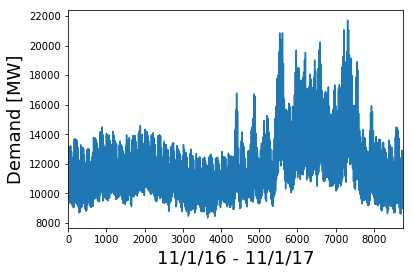

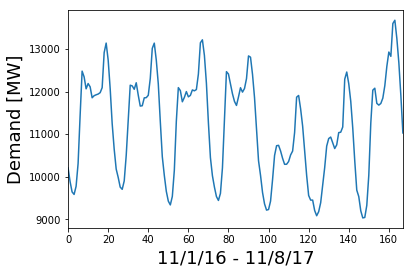

In [381]:
df1 = df1.sort_values('time')
df1.shape

df8 = df1.reset_index(drop=True)

df9 = df8.convert_objects(convert_numeric=True)

ax6 = df9.DEM_MW.plot()
ax6.set_ylabel('Demand [MW]', fontsize=18)
ax6.set_xlabel('11/1/16 - 11/1/17',fontsize=18)
plt.show()

ax7 = df9.DEM_MW[:168].plot()
ax7.set_ylabel('Demand [MW]', fontsize=18)
ax7.set_xlabel('11/1/16 - 11/8/17',fontsize=18)
plt.show()

In [374]:
timefn.sleep(5)

## Model PV Output

In [272]:
#Download Solar Data 
df_SM_solar = pd.read_csv('http://rredc.nrel.gov/solar/old_data/nsrdb/1991-2010/data/hourly/723940/723940_2010_solar.csv')
df_Salem_solar = pd.read_csv('http://rredc.nrel.gov/solar/old_data/nsrdb/1991-2010/data/hourly/726940/726940_2010_solar.csv')

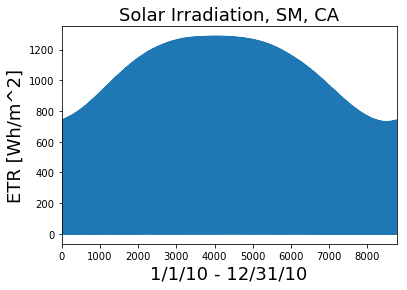

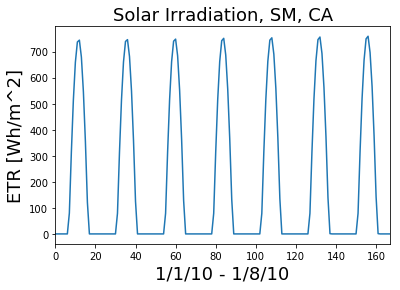

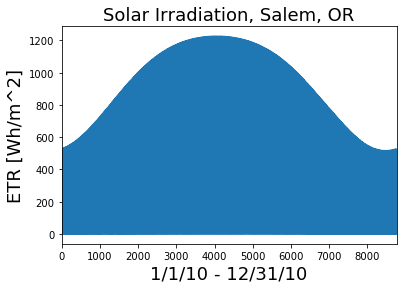

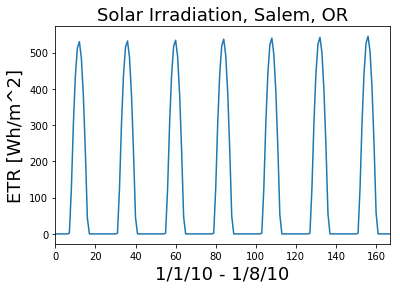

In [273]:

#Don't know how to query col w/ space in name
df_SM_solar = df_SM_solar.rename(columns={'ETR (Wh/m^2)': 'ETR'})


ax5 = df_SM_solar.ETR.plot()
ax5.set_ylabel('ETR [Wh/m^2]', fontsize=18)
ax5.set_xlabel('1/1/10 - 12/31/10',fontsize=18)
ax5.set_title('Solar Irradiation, SM, CA',fontsize=18)
plt.show()

ax6 = df_SM_solar.ETR[:168].plot()
ax6.set_ylabel('ETR [Wh/m^2]', fontsize=18)
ax6.set_xlabel('1/1/10 - 1/8/10',fontsize=18)
ax6.set_title('Solar Irradiation, SM, CA',fontsize=18)
plt.show()

df_Salem_solar = df_Salem_solar.rename(columns={'ETR (Wh/m^2)': 'ETR'})


ax7 = df_Salem_solar.ETR.plot()
ax7.set_ylabel('ETR [Wh/m^2]', fontsize=18)
ax7.set_xlabel('1/1/10 - 12/31/10',fontsize=18)
ax7.set_title('Solar Irradiation, Salem, OR',fontsize=18)
plt.show()

ax8 = df_Salem_solar.ETR[:168].plot()
ax8.set_ylabel('ETR [Wh/m^2]', fontsize=18)
ax8.set_xlabel('1/1/10 - 1/8/10',fontsize=18)
ax8.set_title('Solar Irradiation, Salem, OR',fontsize=18)
plt.show()

In [ ]:
# Solar Data 
#Santa Maria
http://rredc.nrel.gov/solar/old_data/nsrdb/1991-2010/data/hourly/723940/723940_2010_solar.csv

#SLO
http://rredc.nrel.gov/solar/old_data/nsrdb/1991-2010/data/hourly/722897/722897_2010_solar.csv

#Salem
http://rredc.nrel.gov/solar/old_data/nsrdb/1991-2010/data/hourly/726940/726940_2010_solar.csv

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,REPORTTPYE,HOURLYSKYCONDITIONS,HOURLYVISIBILITY,HOURLYPRSENTWEATHERTYPE,...,MonthlyMaxSeaLevelPressureTime,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureDate,MonthlyMinSeaLevelPressureTime,MonthlyTotalHeatingDegreeDays,MonthlyTotalCoolingDegreeDays,MonthlyDeptFromNormalHeatingDD,MonthlyDeptFromNormalCoolingDD,MonthlyTotalSeasonToDateHeatingDD,MonthlyTotalSeasonToDateCoolingDD
0,WBAN:24232,SALEM MCNARY FIELD OR US,62.5,44.9050,-123.0011,2016-11-01 00:56,FM-15,SCT:04 31 OVC:08 60,10.00,NaN,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
1,WBAN:24232,SALEM MCNARY FIELD OR US,62.5,44.9050,-123.0011,2016-11-01 01:56,FM-15,CLR:00,10.00,NaN,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
2,WBAN:24232,SALEM MCNARY FIELD OR US,62.5,44.9050,-123.0011,2016-11-01 02:56,FM-15,OVC:08 60,10.00,NaN,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
3,WBAN:24232,SALEM MCNARY FIELD OR US,62.5,44.9050,-123.0011,2016-11-01 03:56,FM-15,BKN:07 65 BKN:07 80 OVC:08 95,10.00,NaN,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
4,WBAN:24232,SALEM MCNARY FIELD OR US,62.5,44.9050,-123.0011,2016-11-01 04:00,FM-12,57,NaN,NaN,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
5,WBAN:24232,SALEM MCNARY FIELD OR US,62.5,44.9050,-123.0011,2016-11-01 04:56,FM-15,OVC:08 85,10.00,NaN,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
6,WBAN:24232,SALEM MCNARY FIELD OR US,62.5,44.9050,-123.0011,2016-11-01 05:56,FM-15,BKN:07 100,10.00,NaN,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
7,WBAN:24232,SALEM MCNARY FIELD OR US,62.5,44.9050,-123.0011,2016-11-01 06:56,FM-15,BKN:07 95,10.00,NaN,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
8,WBAN:24232,SALEM MCNARY FIELD OR US,62.5,44.9050,-123.0011,2016-11-01 07:56,FM-15,SCT:04 90,10.00,NaN,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
9,WBAN:24232,SALEM MCNARY FIELD OR US,62.5,44.9050,-123.0011,2016-11-01 08:56,FM-15,SCT:04 55,10.00,NaN,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN


## Battery State of Health Modeling




In [310]:
#Weather Forecast data

#Lets look at the forecast every day at noon to decide what to do the next day (starting at midnight)

#Santa Maria, CA
time_forecast = 1477915200 #UNIX epoch time
d = []
for ii in range(365):
      
    URL_json = 'https://api.darksky.net/forecast/0350bd35c145b65f9c56808782d112a4/34.9530,-120.4357,' + str(time_forecast) + '?exclude=currently,minutely,daily,alerts,flags'
    forecast_filename = utils.get_data(URL_json,'json')
    d.append({'time': time_forecast, 'Name': forecast_filename})
    time_forecast = time_forecast + 3600*24

df_SMforecast_filenames = pd.DataFrame(d)

df_SMforecast_filenames.to_csv('SM_forecast_filenames.csv')

#Salem, OR
time_forecast = 1477915200 #UNIX epoch time
d = []
for ii in range(365):
      
    URL_json = 'https://api.darksky.net/forecast/0350bd35c145b65f9c56808782d112a4/44.9429,-123.0351,' + str(time_forecast) + '?exclude=currently,minutely,daily,alerts,flags'
    forecast_filename = utils.get_data(URL_json,'json')
    d.append({'time': time_forecast, 'Name': forecast_filename})
    time_forecast = time_forecast + 3600*24

df_Salemforecast_filenames = pd.DataFrame(d)

df_Salemforecast_filenames.to_csv('Salem_forecast_filenames.csv')

In [382]:
#Load battery dataset

URL = 'http://ti.arc.nasa.gov/c/5/'

fn = utils.get_data(URL,'zip')

Extracting zip


In [387]:
#This is still work in progress

AttributeError: 'dict' object has no attribute 'B0005'

xml_fns

In [389]:
xml_fns

['20161230_20170129_PRC_LMP_DAM_20171109_22_39_33_v1.xml',
 '20170129_20170226_PRC_LMP_DAM_20171109_22_44_32_v1.xml',
 '20170226_20170326_PRC_LMP_DAM_20171109_22_48_57_v1.xml',
 '20170326_20170425_PRC_LMP_DAM_20171109_22_52_29_v1.xml',
 '20170425_20170524_PRC_LMP_DAM_20171109_22_55_08_v1.xml',
 '20170524_20170623_PRC_LMP_DAM_20171109_22_56_31_v1.xml',
 '20170623_20170722_PRC_LMP_DAM_20171109_22_58_03_v1.xml',
 '20170722_20170821_PRC_LMP_DAM_20171109_22_59_27_v1.xml',
 '20170821_20170920_PRC_LMP_DAM_20171109_23_00_54_v1.xml',
 '20170920_20171019_PRC_LMP_DAM_20171109_23_02_18_v1.xml',
 '20171019_20171101_PRC_LMP_DAM_20171109_23_03_36_v1.xml',
 '20161101_20161130_PRC_LMP_DAM_20171109_22_24_58_v1.xml',
 '20161130_20161230_PRC_LMP_DAM_20171109_22_26_41_v1.xml']